In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

from sklearn.preprocessing import StandardScaler, MinMaxScaler

from data.run_models import run_all_models
from data.data_preprocessing import load_and_split_data
from data.predict_from_model import predict_from_model, predict_from_saved_model

from data.plots.plot_model_metrics import plot_model_metrics
from data.plots.plot_improvement import plot_improvement
from data.plots.plot_actual_vs_predicted import plot_actual_vs_predicted, plot_stacking_regressor, plot_deviation_comparison, calculate_deviation

%load_ext autoreload
%autoreload 2

In [2]:
# Load and split data once
X_train, X_test, y_train, y_test, data = load_and_split_data()

In [3]:
# Check the data
print(f'Dataset shape: {data.shape}')
data.head()

Dataset shape: (355, 8)


,A,B,C,D,E,F,G,AOR
0,0.2,0.00005,0.4,0.28,4.000000e-07,0.3,0.6,40.250
1,0.3,0.00005,0.4,0.28,4.000000e-07,0.3,0.6,42.305
2,0.4,0.00005,0.4,0.28,4.000000e-07,0.3,0.6,43.680
3,0.5,0.00005,0.4,0.28,4.000000e-07,0.3,0.6,43.605
4,0.6,0.00005,0.4,0.28,4.000000e-07,0.3,0.6,43.215


In [4]:
# Statistical summary
data.describe()

,A,B,C,D,E,F,G,AOR
count,355.000000,355.000000,355.000000,355.000000,3.550000e+02,355.000000,355.000000,355.000000
mean,0.453400,0.000030,0.405707,0.343448,2.197324e-07,0.365915,0.517538,36.687352
std,0.189653,0.000025,0.190959,0.124833,1.405692e-07,0.132315,0.162453,5.985885
min,0.100000,0.000002,0.100000,0.100000,1.000000e-08,0.100000,0.100000,13.065000
25%,0.300000,0.000008,0.300000,0.280000,6.000000e-08,0.300000,0.365000,32.928750
50%,0.500000,0.000010,0.400000,0.300000,2.000000e-07,0.300000,0.600000,37.145000
75%,0.600000,0.000050,0.400000,0.400000,3.000000e-07,0.400000,0.600000,41.661250
max,0.900000,0.000100,0.900000,0.920000,8.000000e-07,0.900000,0.900000,63.670000


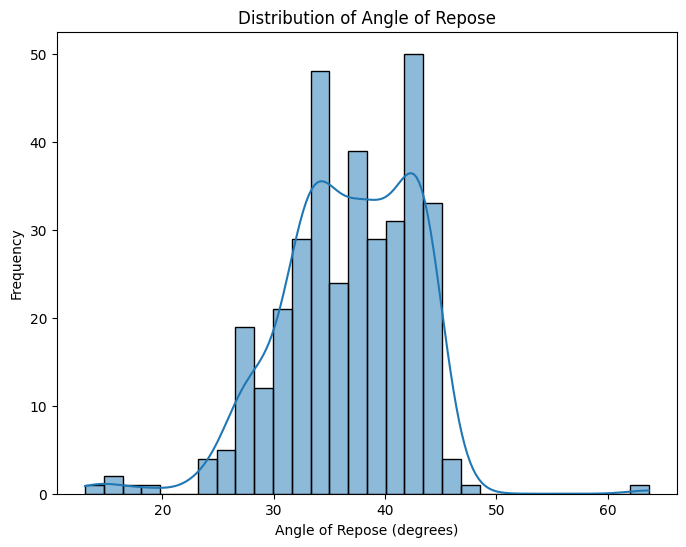

In [5]:
# Distribution of AOR
plt.figure(figsize=(8, 6))
sns.histplot(data['AOR'], kde=True, bins=30)
plt.title('Distribution of Angle of Repose')
plt.xlabel('Angle of Repose (degrees)')
plt.ylabel('Frequency')
plt.show()

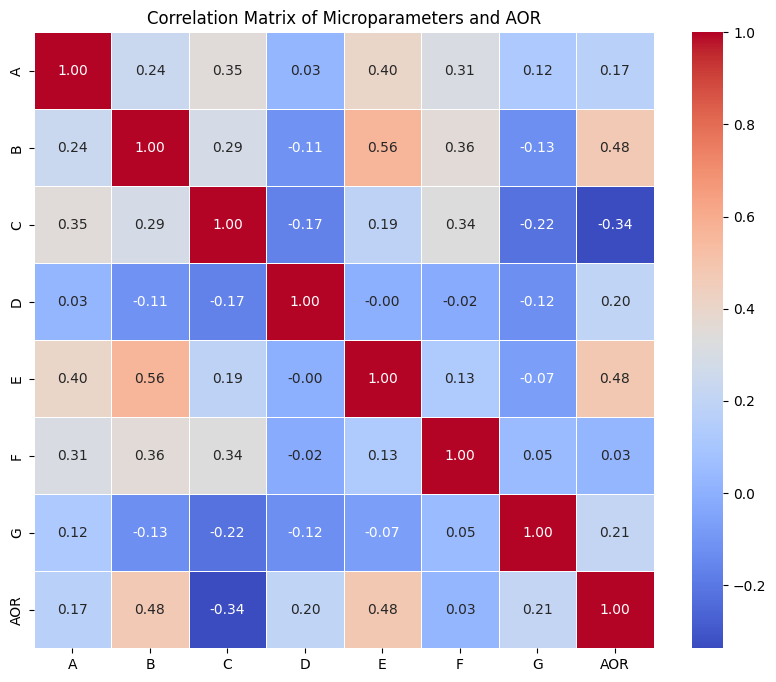

Correlations with AOR:
 AOR    1.000000
E      0.482541
B      0.475126
G      0.212471
D      0.197565
A      0.166894
F      0.025573
C     -0.337008
Name: AOR, dtype: float64


In [6]:
# Compute the correlation matrix
corr_matrix = data.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Microparameters and AOR")
plt.show()

# Focus on AOR correlations
print("Correlations with AOR:\n", corr_matrix["AOR"].sort_values(ascending=False))

In [7]:
results = run_all_models(X_train, X_test, y_train, y_test)
# Convert results to DataFrame
metrics_df = pd.DataFrame(results).T.reset_index().rename(columns={'index': 'Model'})

Bayesian Ridge Regression
MSE: 6.8163
MAE: 1.8847
R2 Score: 0.7580
Best parameters for Bayesian Ridge: {'alpha_1': 0.0001, 'alpha_2': 1e-06, 'alpha_init': 1.9, 'lambda_1': 1e-06, 'lambda_2': 1e-06, 'lambda_init': 1e-09, 'n_iter': 300}
Best MSE: 17.1679
MSE: 6.8163
MAE: 1.8847
R2 Score: 0.7580
Support Vector Regression
MSE: 4.5010
MAE: 1.4632
R2 Score: 0.8402
Best parameters for SVR: {'C': 100.0, 'gamma': 1.0, 'kernel': 'rbf'}
Best MSE: 10.2448
MSE: 2.1158
MAE: 1.0690
R2 Score: 0.9249
Random Forest Regression
MSE: 1.8553
MAE: 1.0226
R2 Score: 0.9341
Best parameters for Random Forest: {'bootstrap': True, 'max_depth': 25, 'max_features': 0.75, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 10}
Best MSE: 8.7851
MSE: 3.3530
MAE: 1.2933
R2 Score: 0.8810
Gradient Boosting Regression
MSE: 1.9905
MAE: 1.0396
R2 Score: 0.9293
Best parameters for Gradient Boosting: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200}
Best MSE: 10.0114
MSE: 2.1060
MAE: 0.9724
R2 Score: 0.925

C:\Users\sukap\anaconda3\envs\cv3dst\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


MSE: 8.8284
MAE: 2.2596
R2 Score: 0.6866


C:\Users\sukap\anaconda3\envs\cv3dst\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Best parameters for MLP: {'activation': 'relu', 'hidden_layer_sizes': (50, 50), 'learning_rate_init': 0.001}
Best MSE: 14.6606


C:\Users\sukap\anaconda3\envs\cv3dst\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


MSE: 4.0320
MAE: 1.3913
R2 Score: 0.8569
XGBoost Regression
MSE: 7.5931
MAE: 1.6312
R2 Score: 0.7305
Tuned XGBoost Regression
Fitting 5 folds for each of 54 candidates, totalling 270 fits
Best Parameters for XGBoost: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 100, 'subsample': 0.8}
MSE: 1.9538
MAE: 0.9720
R2 Score: 0.9306
Stacking Regressor
MSE: 1.7581
MAE: 0.9907
R2 Score: 0.9376
Percentage Deviation: 2.65%


In [8]:
# Display the resulting DataFrame with model metrics
metrics_df.head()

,Model,model,MSE,MAE,R2,y_pred
0,Bayesian Ridge,BayesianRidge(),6.816301,1.884653,0.758033,"[37.62117865890559, 39.61630480903614, 27.2714..."
1,Bayesian Ridge Tuned,"BayesianRidge(alpha_1=0.0001, alpha_init=1.9, ...",6.816301,1.884653,0.758033,"[37.621178677060506, 39.61630483598037, 27.271..."
2,SVR,SVR(),4.500999,1.463198,0.840222,"[37.095034637634626, 39.74985437709302, 27.752..."
3,SVR Tuned,"SVR(C=100.0, gamma=1.0)",2.115807,1.068968,0.924892,"[36.40845153996479, 39.334221899371244, 27.723..."
4,Random Forest,"(DecisionTreeRegressor(max_features=1.0, rando...",1.855297,1.02261,0.93414,"[35.16037499999999, 39.21127499999999, 27.8023..."


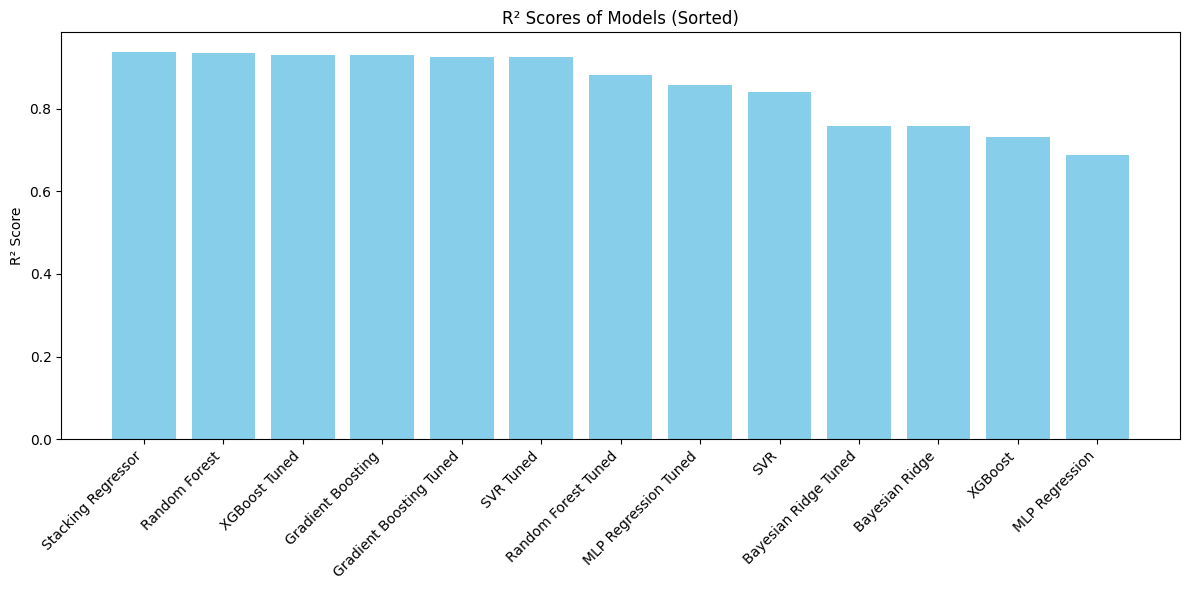

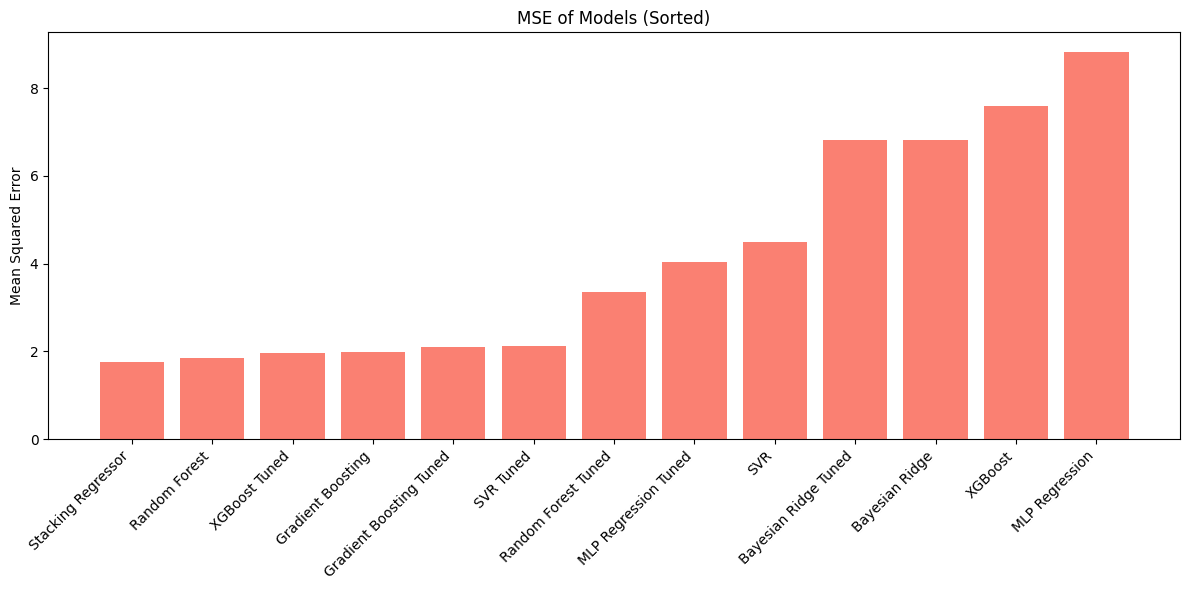

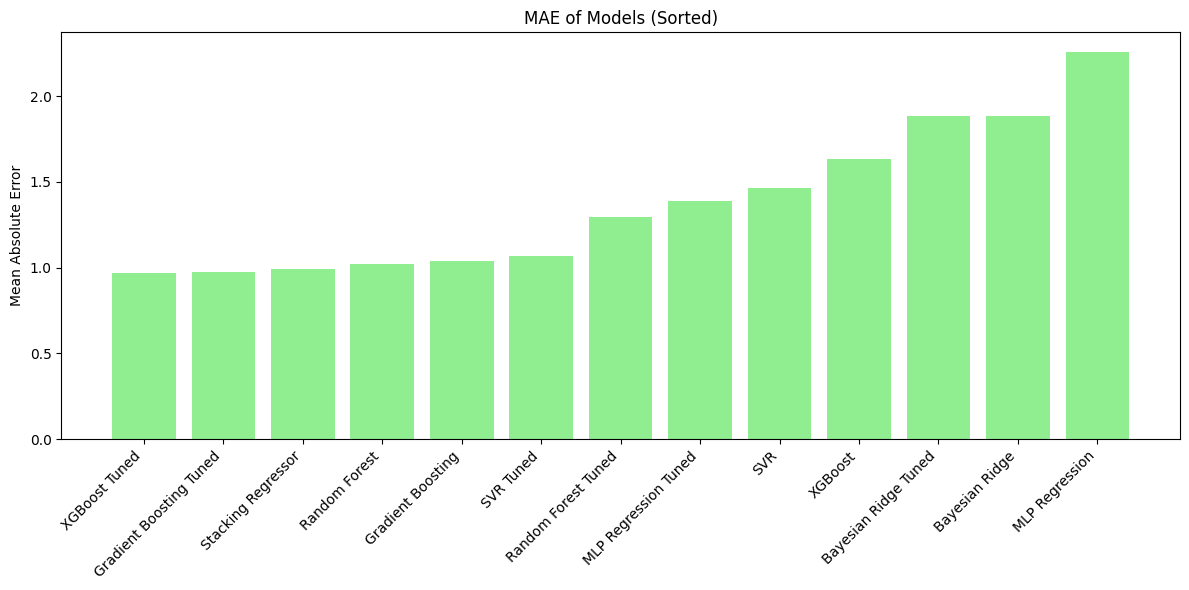

In [9]:
# Plot model metrics
plot_model_metrics(metrics_df)

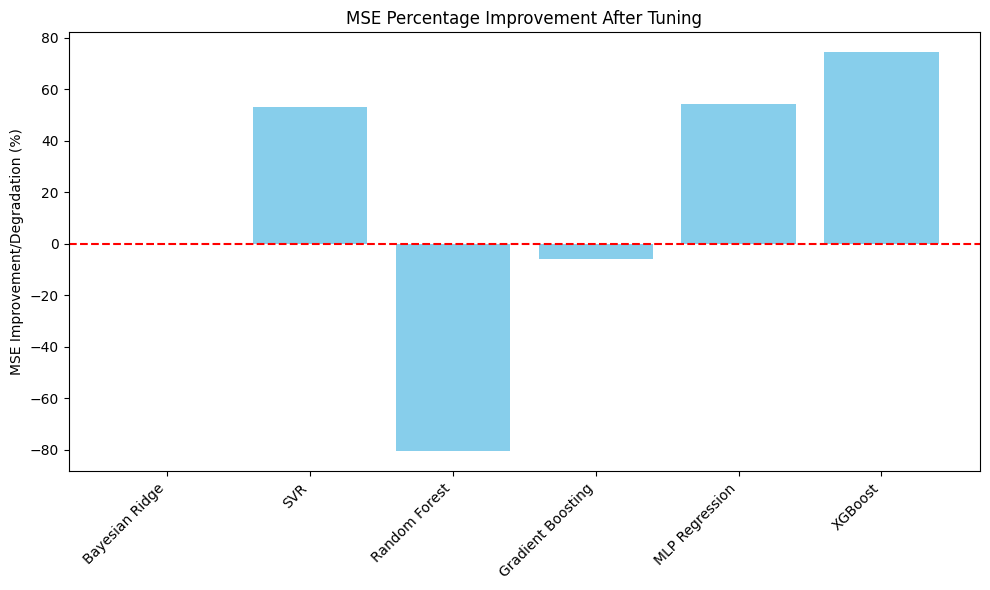

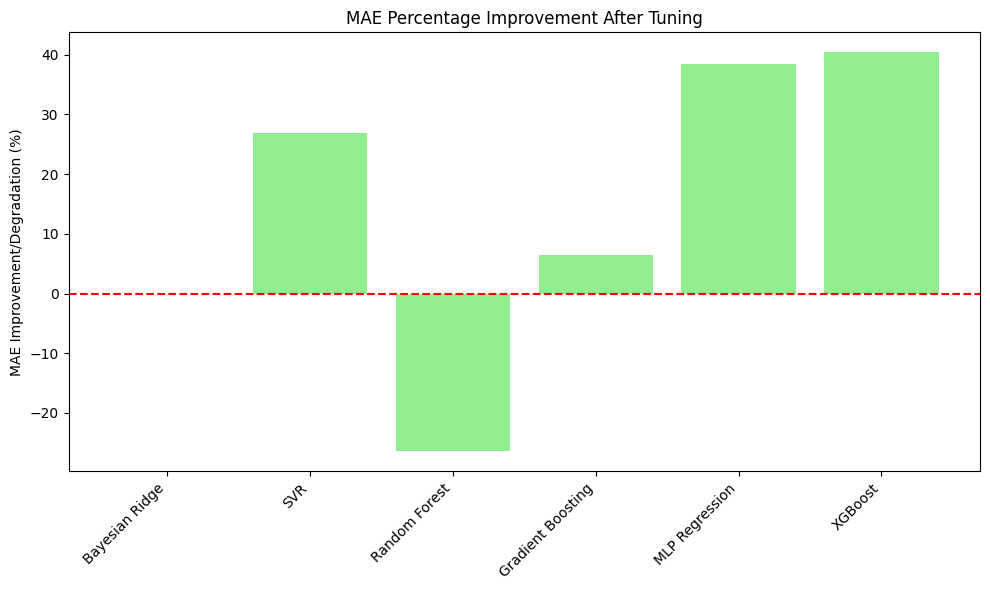

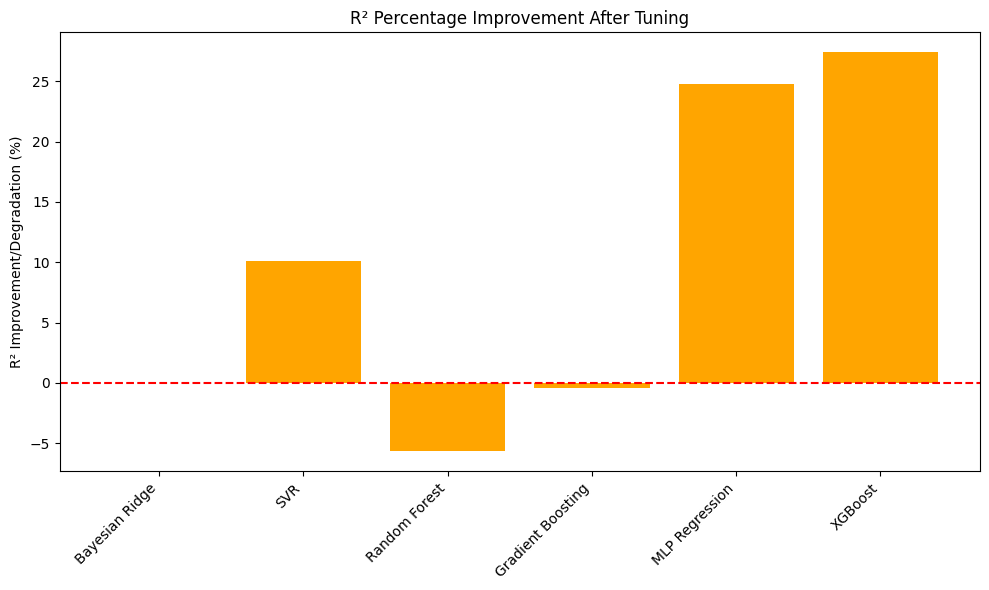

In [10]:
# Base and tuned model pairs
base_and_tuned_pairs = [
    ('Bayesian Ridge', 'Bayesian Ridge Tuned'),
    ('SVR', 'SVR Tuned'),
    ('Random Forest', 'Random Forest Tuned'),
    ('Gradient Boosting', 'Gradient Boosting Tuned'),
    ('MLP Regression', 'MLP Regression Tuned'),
    ('XGBoost', 'XGBoost Tuned')
]

# Plot improvement percentage
plot_improvement(metrics_df, base_and_tuned_pairs)

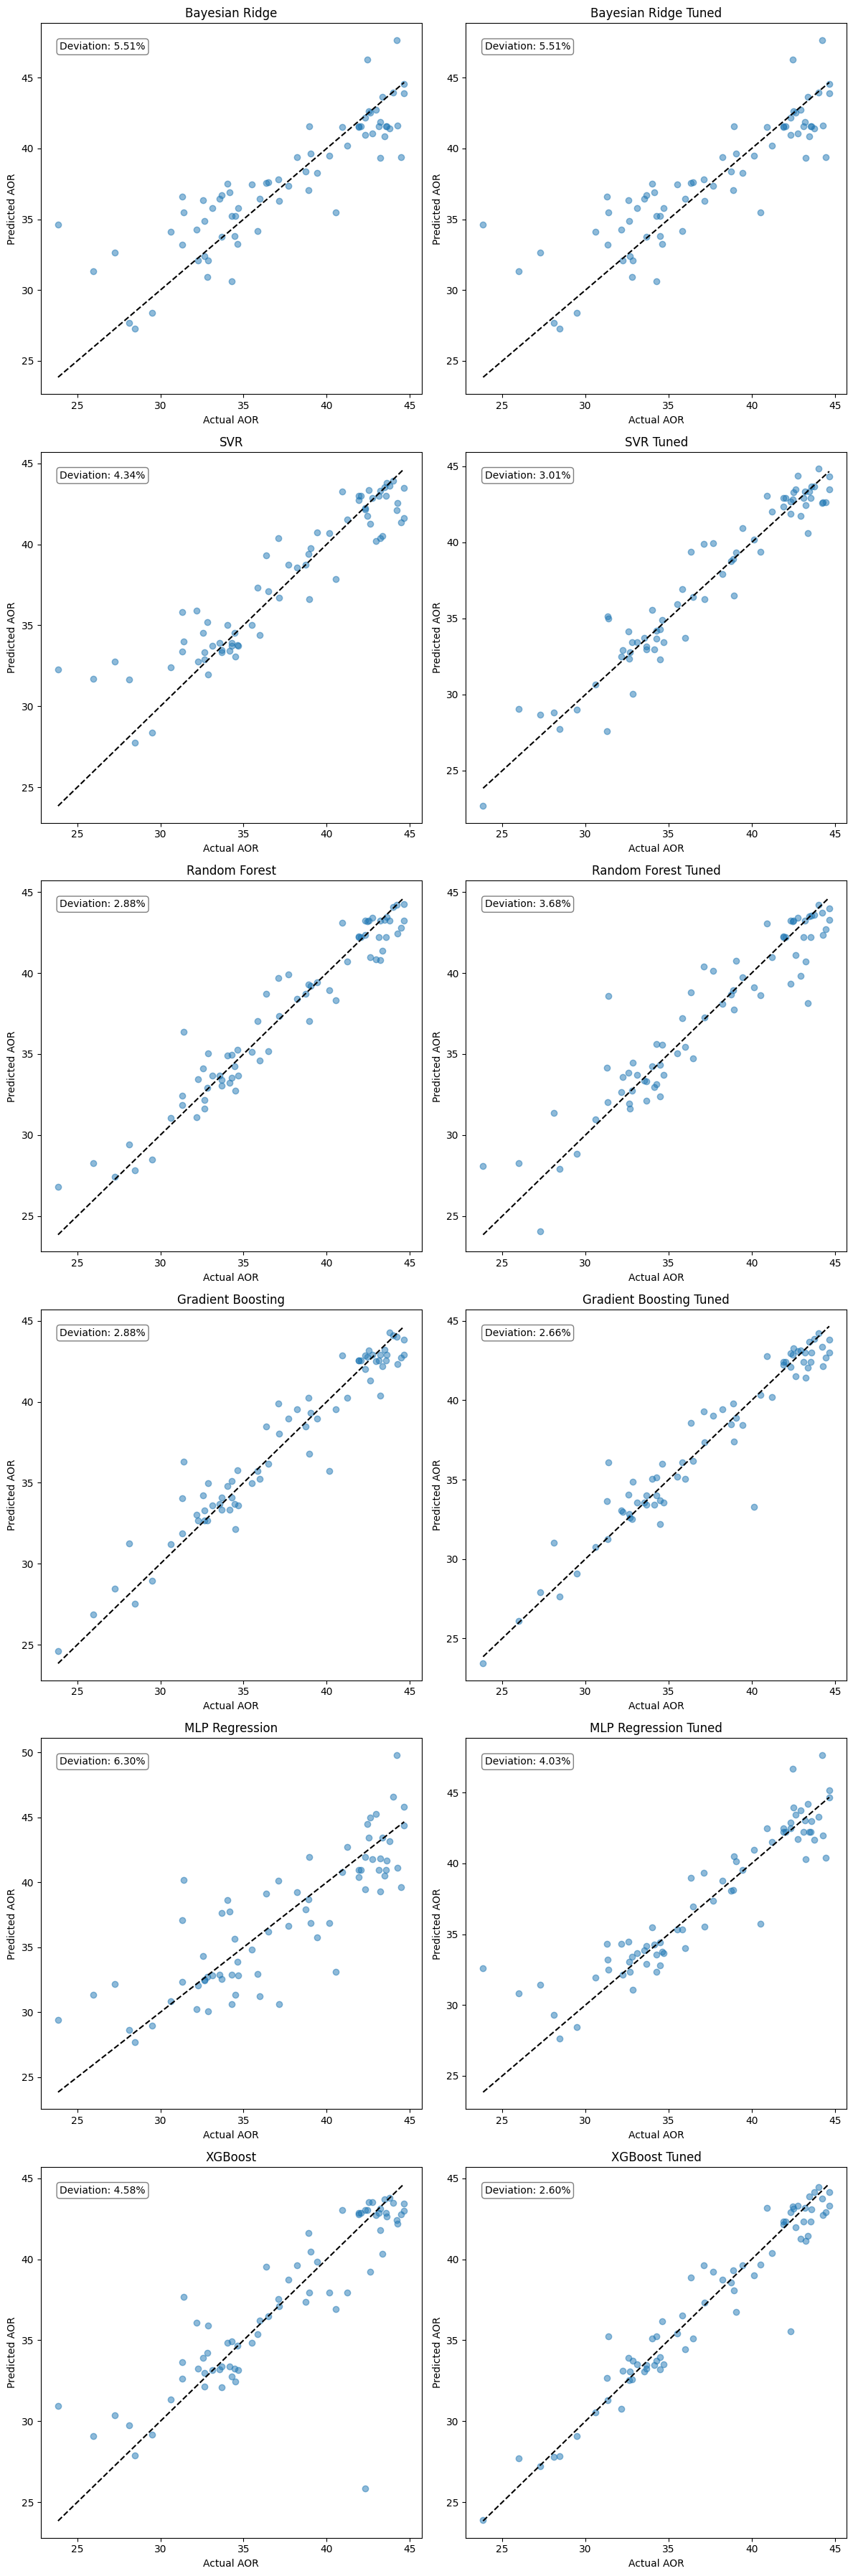

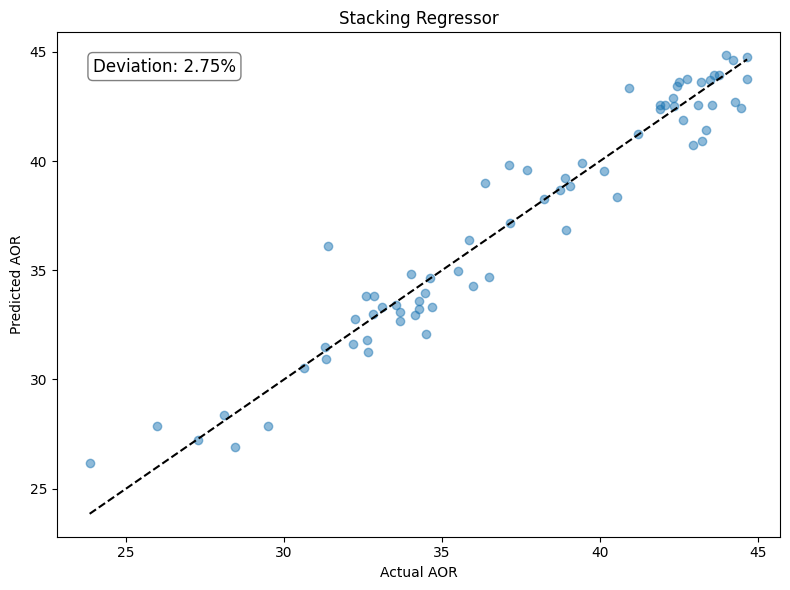

In [11]:
# Plot Actual vs Predicted for Each Model
plot_actual_vs_predicted(y_test, results, base_and_tuned_pairs)
plot_stacking_regressor(y_test, results['Stacking Regressor']['y_pred'])

Best model: XGBoost Tuned with 2.60% deviation


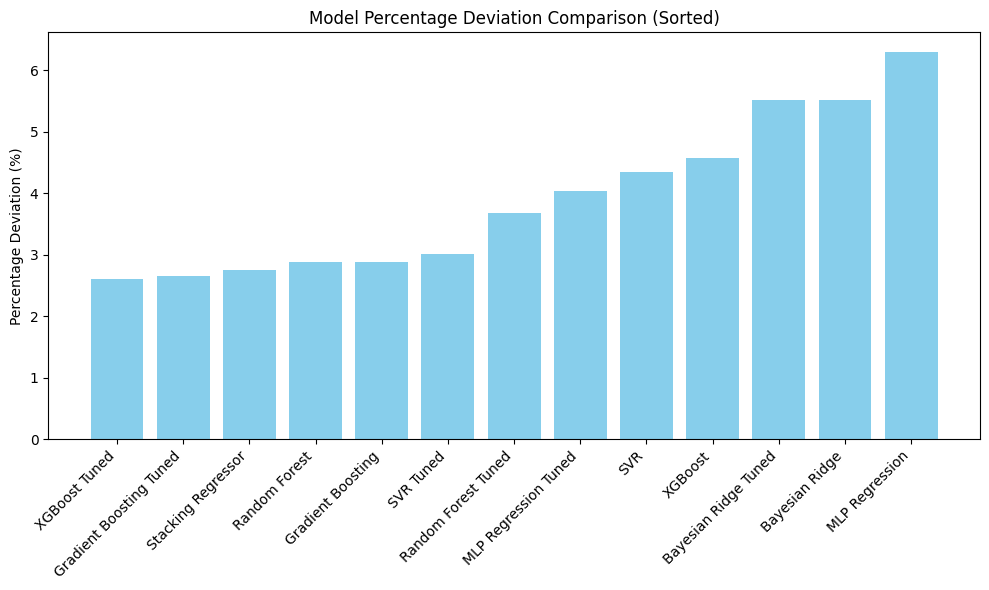

In [12]:
plot_deviation_comparison(y_test, results)

In [13]:
# Sort models by R2 Score
best_model = metrics_df.sort_values(by='R2', ascending=False).iloc[0]
print(f"The best model is {best_model['Model']} with an R2 score of {best_model['R2']:.4f}")

The best model is Stacking Regressor with an R2 score of 0.9376


In [14]:
# Path to save the model
xgboost_model_path = "models/xgboost_model.joblib"
gradient_bossting_model_path = "models/gradient_boosting_model.joblib"
stacking_regressor_model_path = "models/stacking_regressor_model.joblib"

# Save the best models
joblib.dump(results['XGBoost Tuned']['model'], xgboost_model_path)
print(f"Model saved to {xgboost_model_path}")

joblib.dump(results['Gradient Boosting Tuned']['model'], gradient_bossting_model_path)
print(f"Model saved to {gradient_bossting_model_path}")

joblib.dump(results['Stacking Regressor']['model'], stacking_regressor_model_path)
print(f"Model saved to {stacking_regressor_model_path}")

# Save the scalers
standard_scaler = StandardScaler()
standard_scaler.fit_transform(X_train)

standard_scaler_path = "models/standard_scaler.joblib"
joblib.dump(standard_scaler, standard_scaler_path)
print(f"Scaler saved to {standard_scaler_path}")


minmax_scaler = MinMaxScaler()
minmax_scaler.fit_transform(X_train)

minmax_scaler_path = "models/minmax_scaler.joblib"
joblib.dump(minmax_scaler, minmax_scaler_path)
print(f"Scaler saved to {minmax_scaler_path}")

Model saved to models/xgboost_model.joblib
Model saved to models/gradient_boosting_model.joblib
Model saved to models/stacking_regressor_model.joblib
Scaler saved to models/standard_scaler.joblib
Scaler saved to models/minmax_scaler.joblib


In [15]:
manual_input_values = [0.9, 0.00001, 0.9, 0.9, 0.00001, 0.9, 0.9]
manual_input_values = [0.633972545, 1.71E-05, 0.826915955, 0.846487643, 8.51E-08, 0.316061954, 0.545290901]
prediction = predict_from_saved_model(stacking_regressor_model_path, standard_scaler_path, manual_input_values, X_train.columns)
print(f"Prediction for scaled manual input: {prediction}")

Prediction for scaled manual input: [31.82805519]


In [16]:
calculate_deviation(38.58, 37.66533485)

2.370827242094343